In [190]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind

### 1. Load and visualize the data

a) 

In [154]:
core_path = './data'
transcriptomics = pd.read_csv( os.path.join(core_path, 'transcriptomics.dataset.txt'),sep= "\t")

In [155]:
transcriptomics.rename(columns = {"Unnamed:0":'Gene_ID'})

,Unnamed: 0,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
0,ENSG00000000003,18,12,9,20,9,13,20,8,4,...,9,9,30,9,23,16,3,14,11,16
1,ENSG00000000005,0,0,0,2,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
2,ENSG00000000419,10,9,9,8,10,10,6,35,13,...,3,9,9,15,8,9,9,4,16,5
3,ENSG00000000457,0,11,0,6,2,12,11,1,2,...,9,8,8,5,6,0,12,13,4,11
4,ENSG00000000460,0,0,14,4,5,0,0,6,4,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63672,ENSG00000273489,0,0,0,2,0,1,8,0,0,...,0,0,0,0,0,0,0,0,0,0
63673,ENSG00000273490,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63674,ENSG00000273491,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63675,ENSG00000273492,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


What is the size of the matrix ?

63677 genes and 80 samples : matrix size 63677*80

b) What type of data do you have? Normalized or raw read counts (integer)?

number of transcripts, raw read counts

c)

In [156]:
print(list(transcriptomics.columns.values))

['Unnamed: 0', 'Sample_1_preadi', 'Sample_2_preadi', 'Sample_3_preadi', 'Sample_4_preadi', 'Sample_5_preadi', 'Sample_6_preadi', 'Sample_7_preadi', 'Sample_8_preadi', 'Sample_9_preadi', 'Sample_10_preadi', 'Sample_11_preadi', 'Sample_12_preadi', 'Sample_13_preadi', 'Sample_14_preadi', 'Sample_15_preadi', 'Sample_16_preadi', 'Sample_17_preadi', 'Sample_18_preadi', 'Sample_19_preadi', 'Sample_20_preadi', 'Sample_21_preadi', 'Sample_22_preadi', 'Sample_23_preadi', 'Sample_24_preadi', 'Sample_25_preadi', 'Sample_26_preadi', 'Sample_27_preadi', 'Sample_28_preadi', 'Sample_29_preadi', 'Sample_30_preadi', 'Sample_31_preadi', 'Sample_32_preadi', 'Sample_33_preadi', 'Sample_34_preadi', 'Sample_35_preadi', 'Sample_36_preadi', 'Sample_37_preadi', 'Sample_38_preadi', 'Sample_39_preadi', 'Sample_40_preadi', 'Sample_41_adipo', 'Sample_42_adipo', 'Sample_43_adipo', 'Sample_44_adipo', 'Sample_45_adipo', 'Sample_46_adipo', 'Sample_47_adipo', 'Sample_48_adipo', 'Sample_49_adipo', 'Sample_50_adipo', 'Sam

In [157]:
dict_sample = {}
for idx, sample in enumerate(transcriptomics.columns.values[1:]) :
    if ( sample == "Sample_{}_preadi".format(idx+1) ):
        #dict_sample["Sample_{}".format(idx+1)]="PreAdipo"
        dict_sample[sample]="PreAdipo"
    else :
        dict_sample[sample]="Adipo"
        

In [158]:
transcriptomics

,Unnamed: 0,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
0,ENSG00000000003,18,12,9,20,9,13,20,8,4,...,9,9,30,9,23,16,3,14,11,16
1,ENSG00000000005,0,0,0,2,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
2,ENSG00000000419,10,9,9,8,10,10,6,35,13,...,3,9,9,15,8,9,9,4,16,5
3,ENSG00000000457,0,11,0,6,2,12,11,1,2,...,9,8,8,5,6,0,12,13,4,11
4,ENSG00000000460,0,0,14,4,5,0,0,6,4,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63672,ENSG00000273489,0,0,0,2,0,1,8,0,0,...,0,0,0,0,0,0,0,0,0,0
63673,ENSG00000273490,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63674,ENSG00000273491,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63675,ENSG00000273492,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


d)

In [159]:
transcriptomics.iloc[:,1:]

,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,Sample_10_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
0,18,12,9,20,9,13,20,8,4,7,...,9,9,30,9,23,16,3,14,11,16
1,0,0,0,2,0,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
2,10,9,9,8,10,10,6,35,13,15,...,3,9,9,15,8,9,9,4,16,5
3,0,11,0,6,2,12,11,1,2,0,...,9,8,8,5,6,0,12,13,4,11
4,0,0,14,4,5,0,0,6,4,0,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63672,0,0,0,2,0,1,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
(transcriptomics.iloc[:,1:] != 0).any(axis=1)

0         True
1         True
2         True
3         True
4         True
         ...  
63672     True
63673    False
63674    False
63675    False
63676     True
Length: 63677, dtype: bool

In [161]:
transcriptomics = transcriptomics.loc[(transcriptomics.iloc[:,1:] != 0).any(axis=1),:]

In [162]:
transcriptomics

,Unnamed: 0,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
0,ENSG00000000003,18,12,9,20,9,13,20,8,4,...,9,9,30,9,23,16,3,14,11,16
1,ENSG00000000005,0,0,0,2,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
2,ENSG00000000419,10,9,9,8,10,10,6,35,13,...,3,9,9,15,8,9,9,4,16,5
3,ENSG00000000457,0,11,0,6,2,12,11,1,2,...,9,8,8,5,6,0,12,13,4,11
4,ENSG00000000460,0,0,14,4,5,0,0,6,4,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63668,ENSG00000273485,0,0,0,1,0,5,0,0,0,...,0,0,0,0,0,12,0,0,0,0
63669,ENSG00000273486,0,0,0,0,1,0,0,0,0,...,0,2,0,3,0,2,5,1,0,0
63670,ENSG00000273487,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63672,ENSG00000273489,0,0,0,2,0,1,8,0,0,...,0,0,0,0,0,0,0,0,0,0


e)

In [163]:
transcriptomics.iloc[:,1:].sum()

Sample_1_preadi    1000000
Sample_2_preadi    1000000
Sample_3_preadi    1000000
Sample_4_preadi    1000000
Sample_5_preadi    1000000
                    ...   
Sample_76_adipo    1000000
Sample_77_adipo    1000000
Sample_78_adipo    1000000
Sample_79_adipo    1000000
Sample_80_adipo    1000000
Length: 80, dtype: int64

In [164]:
depth = pd.DataFrame({'Samples':list(range(1,81)), 'depth':transcriptomics.iloc[:,1:].sum()})

In [165]:
(transcriptomics.iloc[:,1:].sum() == 1000000).all()

True

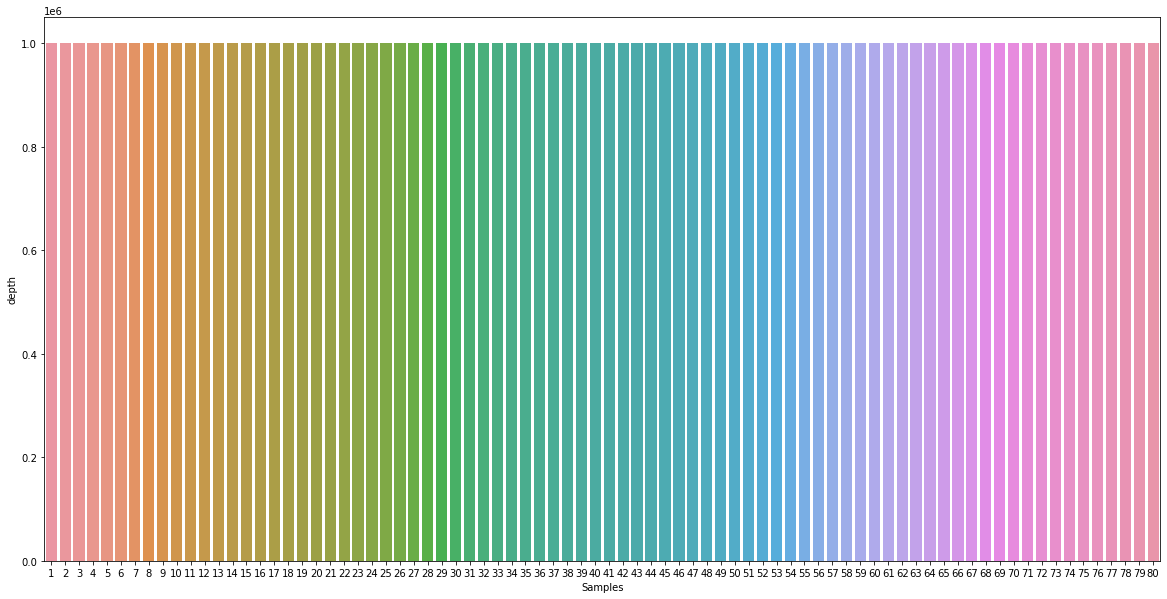

In [166]:
plt.figure(figsize=(20,10))
ax =sns.barplot( data=depth, y='depth', x="Samples")

Do not need to normalized

f)

In [167]:
dict_sample.values()

dict_values(['PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo'])

In [168]:
X = transcriptomics.iloc[:,1:].T.to_numpy(dtype=float)
pca = PCA(n_components=3)
pca_output = pca.fit_transform(X)
pca_output_df = pd.DataFrame(pca_output, columns=['PCA1', 'PCA2', 'PCA3'])
pca_output_df["groups"] =dict_sample.values()
pca_output_df

,PCA1,PCA2,PCA3,groups
0,59744.204875,5181.484207,34953.673194,PreAdipo
1,-36447.502550,11214.469551,6564.207381,PreAdipo
2,-15666.397486,-7873.272341,3183.165238,PreAdipo
3,-22423.413307,-20027.140990,-15412.563780,PreAdipo
4,-15830.729625,-13797.002922,-8727.933106,PreAdipo
...,...,...,...,...
75,39830.374618,16913.116447,2542.199214,Adipo
76,44353.454788,-2109.828106,-14291.751796,Adipo
77,-2515.045934,2289.387447,-29504.065115,Adipo
78,-23979.413582,32201.099006,-2077.782790,Adipo


In [169]:
fig = px.scatter_3d(pca_output_df, x='PCA1', y='PCA2', z='PCA3', color="groups")
fig.show()

g)

In [182]:
transcriptomics_transf =pd.DataFrame(np.log2(1+transcriptomics.iloc[:,1:]))

In [183]:
transcriptomics_transf.insert(0, 'Gene_ID', transcriptomics.iloc[:,0])

In [184]:
transcriptomics_transf

,Gene_ID,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
0,ENSG00000000003,2.391748,2.232796,2.111675,2.430905,2.111675,2.265243,2.430905,2.060021,1.732021,...,2.111675,2.111675,2.573907,2.111675,2.481548,2.346946,1.584963,2.294809,2.196910,2.346946
1,ENSG00000000005,0.000000,0.000000,0.000000,1.370143,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,2.562399,1.370143,2.465599,1.584963,0.000000,1.370143,0.000000,1.841958
2,ENSG00000000419,2.156860,2.111675,2.111675,2.060021,2.156860,2.156860,1.928789,2.625253,2.265243,...,1.584963,2.111675,2.111675,2.321928,2.060021,2.111675,2.111675,1.732021,2.346946,1.841958
3,ENSG00000000457,0.000000,2.196910,0.000000,1.928789,1.370143,2.232796,2.196910,1.000000,1.370143,...,2.111675,2.060021,2.060021,1.841958,1.928789,0.000000,2.232796,2.265243,1.732021,2.196910
4,ENSG00000000460,0.000000,0.000000,2.294809,1.732021,1.841958,0.000000,0.000000,1.928789,1.732021,...,0.000000,0.000000,1.584963,0.000000,1.000000,0.000000,1.000000,1.732021,0.000000,2.156860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63668,ENSG00000273485,0.000000,0.000000,0.000000,1.000000,0.000000,1.841958,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.232796,0.000000,0.000000,0.000000,0.000000
63669,ENSG00000273486,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.370143,0.000000,1.584963,0.000000,1.370143,1.841958,1.000000,0.000000,0.000000
63670,ENSG00000273487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
63672,ENSG00000273489,0.000000,0.000000,0.000000,1.370143,0.000000,1.000000,2.060021,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


h)

In [186]:
X = transcriptomics_transf.iloc[:,1:].T.to_numpy(dtype=float)
pca = PCA(n_components=3)
pca_output_log = pca.fit_transform(X)
pca_output_log_df = pd.DataFrame(pca_output, columns=['PCA1', 'PCA2', 'PCA3'])
pca_output_log_df["groups"] =dict_sample.values()
pca_output_log_df

,PCA1,PCA2,PCA3,groups
0,-17.749151,34.266155,5.525127,PreAdipo
1,-22.552365,-7.312693,-8.227869,PreAdipo
2,-30.524236,-12.760759,19.221244,PreAdipo
3,-27.212543,-33.857525,-2.473150,PreAdipo
4,-23.255734,-21.349430,7.548643,PreAdipo
...,...,...,...,...
75,25.144706,-3.893504,-23.611646,Adipo
76,30.471017,1.282004,18.543312,Adipo
77,24.813377,-25.893169,3.915634,Adipo
78,14.799681,-11.648532,-19.435448,Adipo


In [187]:
fig = px.scatter_3d(pca_output_log_df, x='PCA1', y='PCA2', z='PCA3', color="groups")
fig.show()

TRansformed data has better cluster

### 2. Differential gene expression

In [189]:
de_results = pd.DataFrame(columns = ["pval"," fdr"," log2_mean_preadipo","log2_mean_adipo","log2_fold_change"])

a)

In [218]:
pvalue=[]
for index, gene in transcriptomics_transf.iterrows():
    #Adipo_samples = {i for i in dict_sample if dict_sample[i]=="Adipo"}
    # PreAdipo_samples = {i for i in dict_sample if dict_sample[i]=="PreAdipo"}
    # ttest_ind(gene[Adipo_samples], gene[PreAdipo_samples])
    _,pval =(ttest_ind(gene[1:41], gene[42:81]))
    pvalue.append(pval)

In [219]:
pvalue

[0.04701784462671299,
 1.0986218175274017e-11,
 0.2742698261584847,
 0.39878189582293677,
 0.4062642805989032,
 1.0618240634894246e-11,
 3.051854712420205e-06,
 1.1463122831865571e-07,
 0.0022092877854286213,
 0.07517865611933183,
 0.5912599975512276,
 0.9920635163736433,
 0.7933664659871339,
 0.21457766246225835,
 0.3001173760238852,
 0.16653606980454178,
 0.2622211808730216,
 0.014475379559570118,
 0.13794134950760312,
 0.1823692905231653,
 0.3142764240989545,
 0.3541976713077023,
 0.6042868006927162,
 0.02121922567153085,
 0.8521387399787116,
 0.6004667595687166,
 0.19220198089584306,
 0.40860867712436566,
 0.024968562332107896,
 6.2882583377491736e-15,
 0.9289773475220018,
 0.7881835362787093,
 0.31096866324219086,
 1.1763981748009452e-17,
 0.5779583310012939,
 0.7283673648570083,
 0.6052107426514977,
 2.517212192300383e-08,
 1.4819062980507868e-05,
 0.5316653690409036,
 0.57074246178234,
 0.9795997218601918,
 0.5581103184278515,
 0.22460100594878918,
 1.2912593725188428e-05,
 0.44

next step Welch test guys (enfin chais pas jai pas verif la variance)